# DETR - Detection Transformer
Reference: https://github.com/NielsRogge/Transformers-Tutorials/blob/master/DETR/Fine_tuning_DetrForObjectDetection_on_custom_dataset_(balloon).ipynb


Original DETR paper: https://arxiv.org/abs/2005.12872

Original DETR repo: https://github.com/facebookresearch/detr


In [1]:
!python --version

Python 3.9.18


In [2]:
!python -m pip install --upgrade pip

!pip install supervision==0.3.0

!pip install transformers

!pip install pytorch-lightning

!pip install timm

!pip install cython

!pip install pycocotools

!pip install scipy

  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
  Using cached supervision-0.3.0-py3-none-any.whl.metadata (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 962.9 kB/s eta 0:00:00 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
Using cached supervision-0.3.0-py3-none-any.whl (21 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 20.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 22.5 MB/s et

In [3]:
!pip --version

pip 24.1.2 from /Users/shivanshamattya/opt/anaconda3/envs/xplorazzi/lib/python3.9/site-packages/pip (python 3.9)


In [4]:
import torch
torch.__version__

'2.2.2'

In [1]:
# !pip install supervision

  Using cached opencv-python-headless-4.10.0.84.tar.gz (95.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/Users/shivanshamattya/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/Users/shivanshamattya/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/shivanshamattya/opt/anaconda3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 112, in get_requires_for_build_wheel
          backen

In [5]:
import supervision
import transformers

supervision.__version__ , transformers.__version__

Matplotlib is building the font cache; this may take a moment.
/Users/shivanshamattya/opt/anaconda3/envs/xplorazzi/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


('0.3.0', '4.42.4')

In [6]:
import pytorch_lightning
print(pytorch_lightning.__version__)

2.3.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
from transformers import DetrImageProcessor
image_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

In [10]:
import os
import torchvision

dataset = '/Users/shivanshamattya/Downloads/bone fracture.v2-release.coco'

ANNOTATION_FILE_NAME = "annotations.json"
TRAIN_DIRECTORY = os.path.join(dataset, "train")
VAL_DIRECTORY = os.path.join(dataset, "val")
TEST_DIRECTORY = os.path.join(dataset, "test")


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(
        self,
        image_directory_path: str,
        image_processor,
        train: bool = True
    ):
        annotation_file_path = os.path.join(image_directory_path, ANNOTATION_FILE_NAME)
        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor

    def __getitem__(self, idx):
        images, annotations = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        annotations = {'image_id': image_id, 'annotations': annotations}
        encoding = self.image_processor(images=images, annotations=annotations, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        target = encoding["labels"][0]

        return pixel_values, target


TRAIN_DATASET = CocoDetection(image_directory_path=TRAIN_DIRECTORY, image_processor=image_processor, train=True)
VAL_DATASET = CocoDetection(image_directory_path=VAL_DIRECTORY, image_processor=image_processor, train=False)
TEST_DATASET = CocoDetection(image_directory_path=TEST_DIRECTORY, image_processor=image_processor, train=False)

print("Number of training examples:", len(TRAIN_DATASET))
print("Number of validation examples:", len(VAL_DATASET))
print("Number of test examples:", len(TEST_DATASET))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Number of training examples: 326
Number of validation examples: 88
Number of test examples: 44


In [ ]:
import os

file_path = '/content/drive/MyDrive/Dataset/xplorazzi/train/annotations.json'
print("File exists:", os.path.exists(file_path))


Image #53


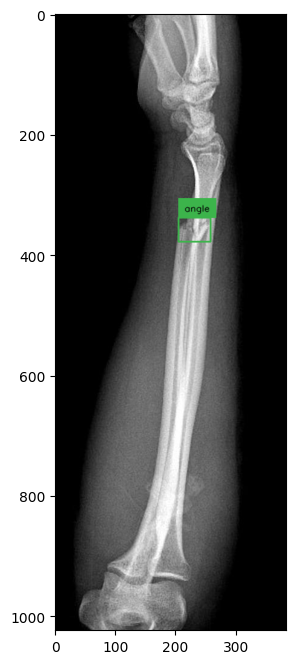

In [11]:
# Visualize if dataset is loaded properly

import random
import cv2
import numpy as np
import supervision as sv



# select random image
image_ids = TRAIN_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TRAIN_DATASET.coco.loadImgs(image_id)[0]
annotations = TRAIN_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TRAIN_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# annotate
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)

# we will use id2label function for training
categories = TRAIN_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}

labels = [
    f"{id2label[class_id]}"
    for _, _, class_id, _
    in detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(image, (8, 8))

In [12]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    pixel_values = [item[0] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    return {
        'pixel_values': encoding['pixel_values'],
        'pixel_mask': encoding['pixel_mask'],
        'labels': labels
    }

TRAIN_DATALOADER = DataLoader(dataset=TRAIN_DATASET, collate_fn=collate_fn, batch_size=4, shuffle=True)
VAL_DATALOADER = DataLoader(dataset=VAL_DATASET, collate_fn=collate_fn, batch_size=4)
TEST_DATALOADER = DataLoader(dataset=TEST_DATASET, collate_fn=collate_fn, batch_size=4)

# Train model with PyTorch Lightning

The DETR model is loaded using the Hugging Face Transformers library

In [13]:
import pytorch_lightning as pl
from transformers import DetrForObjectDetection
import torch


class Detr(pl.LightningModule):

    def __init__(self, lr, lr_backbone, weight_decay):
        super().__init__()
        self.model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50",
                num_labels=len(id2label),
                ignore_mismatched_sizes=True
        )

        self.lr = lr
        self.lr_backbone = lr_backbone
        self.weight_decay = weight_decay

    def forward(self, pixel_values, pixel_mask):
        return self.model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    def common_step(self, batch, batch_idx):
        pixel_values = batch["pixel_values"]
        pixel_mask = batch["pixel_mask"]
        labels = [{k: v.to(self.device) for k, v in t.items()} for t in batch["labels"]]

        outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask, labels=labels)

        loss = outputs.loss
        loss_dict = outputs.loss_dict

        return loss, loss_dict

    def training_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        # logs metrics for each training_step, and the average across the epoch
        self.log("training_loss", loss)
        for k,v in loss_dict.items():
            self.log("train_" + k, v.item())

        return loss

    def validation_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        self.log("validation/loss", loss)
        for k, v in loss_dict.items():
            self.log("validation_" + k, v.item())

        return loss

    def configure_optimizers(self):
        # DETR authors decided to use different learning rate for backbone
        # you can learn more about it here:
        # - https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/main.py#L22-L23
        # - https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/main.py#L131-L139
        param_dicts = [
            {
                "params": [p for n, p in self.named_parameters() if "backbone" not in n and p.requires_grad]},
            {
                "params": [p for n, p in self.named_parameters() if "backbone" in n and p.requires_grad],
                "lr": self.lr_backbone,
            },
        ]
        return torch.optim.AdamW(param_dicts, lr=self.lr, weight_decay=self.weight_decay)

    def train_dataloader(self):
        return TRAIN_DATALOADER

    def val_dataloader(self):
        return VAL_DATALOADER

In [ ]:
pip install timm

In [ ]:
import timm
print("timm version:", timm.__version__)


In [14]:
model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)

batch = next(iter(TRAIN_DATALOADER))
outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model checkpoin

In [15]:
from pytorch_lightning import Trainer

In [21]:
model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)

batch = next(iter(TRAIN_DATALOADER))
# Rename the variable to avoid overwriting the model
outputs_detr = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

MAX_EPOCHS = 2

trainer = Trainer(devices=1, accelerator="cpu", max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, accumulate_grad_batches=8, log_every_n_steps=5)

trainer.fit(model) # Pass the original Detr (LightningModule) instance to trainer.fit()

Epoch 0:   5%|▍         | 4/82 [40:41<13:13:32,  0.00it/s, v_num=1]


KeyboardInterrupt: 

# Save and load model

In [ ]:
import torch

MODEL_PATH = 'custom-model'
model.model.save_pretrained(MODEL_PATH)

# loading model
model = DetrForObjectDetection.from_pretrained(MODEL_PATH)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu" # Define DEVICE here
model.to(DEVICE)

In [ ]:
image_ids = TEST_DATASET.coco.getImgIds()
for image_id in random.sample(image_ids, 10):  # Check 10 random images
    image = TEST_DATASET.coco.loadImgs(image_id)[0]
    annotations = TEST_DATASET.coco.imgToAnns[image_id]
    if annotations:
        print(f'Image ID {image_id} has annotations.')
    else:
        print(f'Image ID {image_id} has no annotations.')



# Inference on test dataset

Let's visualize the predictions of DETR on the first image of the validation set.

In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import supervision as sv

# Assuming TEST_DATASET and its setup is already defined and correct

# Use a specific image ID known to have annotations
image_id = 10  # Change this to any ID confirmed to have annotations
print('Selected Image ID:', image_id)

# Load image and annotations
image_info = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image_info['file_name'])
image = cv2.imread(image_path)

# Check if image loaded successfully
if image is not None:
    print("Image loaded successfully")
else:
    print("Failed to load image, check the path:", image_path)

# Ensure annotations are loaded
if annotations:
    print("Annotations loaded:", annotations)

    # Utilize 'id2label' dictionary assuming it's already defined as:
    # id2label = {category_id: category['name'] for category_id, category in TEST_DATASET.coco.cats.items()}

    # Process annotations to create detections
    detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
    labels = [f"{id2label[ann['category_id']]}" for ann in annotations]

    # Annotate ground truth on the image
    box_annotator = sv.BoxAnnotator()
    frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

    # Display the annotated image
    plt.imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
    plt.title('Ground Truth')
    plt.axis('off')
    plt.show()
else:
    print("No annotations available for this image.")



In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import supervision as sv

# Assuming TEST_DATASET and its setup is already defined and correct

# Select a random image ID from available annotations
image_ids = TEST_DATASET.coco.getImgIds()
if not image_ids:
    print("No image IDs available in the dataset.")
    exit()

image_id = random.choice(image_ids)
print('Selected Random Image ID:', image_id)

# Load image and annotations
image_info = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image_info['file_name'])
image = cv2.imread(image_path)

# Check if image loaded successfully
if image is not None:
    print("Image loaded successfully")
else:
    print("Failed to load image, check the path:", image_path)
    exit()

# Ensure annotations are loaded
if annotations:
    print("Annotations loaded for the selected image.")

    # Utilize 'id2label' dictionary assuming it's already defined as:
    # id2label = {category_id: category['name'] for category_id, category in TEST_DATASET.coco.cats.items()}

    # Process annotations to create detections
    detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
    labels = [f"{id2label[ann['category_id']]}" for ann in annotations]

    # Annotate ground truth on the image
    box_annotator = sv.BoxAnnotator()
    frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

    # Display the annotated image
    plt.imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
    plt.title('Ground Truth')
    plt.axis('off')
    plt.show()
else:
    print("No annotations available for the selected image.")


In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import supervision as sv
import torch  # Assuming use of PyTorch for the model

# Assuming TEST_DATASET and its setup is already defined and correct
# Assuming 'model' and 'transform' (for image preprocessing) are defined elsewhere in your code

# Use a specific image ID known to have annotations
image_id = 10  # Change this to any ID confirmed to have annotations
print('Selected Image ID:', image_id)

# Load image and annotations
image_info = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image_info['file_name'])
image = cv2.imread(image_path)

# Check if image loaded successfully
if image is not None:
    print("Image loaded successfully")
else:
    print("Failed to load image, check the path:", image_path)
    exit()  # Exit if no image is found to avoid further errors

# Ensure annotations are loaded
if annotations:
    print("Annotations loaded:", annotations)
else:
    print("No annotations available for this image.")

# Utilize 'id2label' dictionary assuming it's already defined as:
id2label = {category_id: category['name'] for category_id, category in TEST_DATASET.coco.cats.items()}

# Process annotations to create detections
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
labels = [f"{id2label[ann['category_id']]}" for ann in annotations]

# Annotate ground truth on the image
box_annotator = sv.BoxAnnotator()
frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# Model inference (replace this part with your actual model and preprocessing)
# Assuming 'model' is your trained model and 'transform' is the preprocessing function
model.eval()  # Set model to evaluation mode
transformed_image = torch.from_numpy(image).permute(2, 0, 1).unsqueeze(0)  # Dummy transform
with torch.no_grad():
    output = model(transformed_image)  # Dummy model inference

# Process model output to extract detections (this is a placeholder, adjust according to your model's output)
model_detections = sv.Detections.from_dummy_model_output(output)  # Assuming such a function exists

# Annotate model detections on the image
frame_model_detections = box_annotator.annotate(scene=image.copy(), detections=model_detections, labels=labels)

# Display both ground truth and model detections
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
axs[0].set_title('Ground Truth')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(frame_model_detections, cv2.COLOR_BGR2RGB))
axs[1].set_title('Model Detections')
axs[1].axis('off')

plt.show()


In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt


# utils
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
box_annotator = sv.BoxAnnotator()

# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# Annotate ground truth
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
labels = [f"{id2label[class_id]}" for _, _, class_id, _ in detections]
frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)




# Annotate detections
with torch.no_grad():

    # load image and predict
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]


    detections = sv.Detections.from_transformers(transformers_results=results)
    labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]
    frame_detections = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)


# %matplotlib inline # Remove this line, we won't use it anymore

# Combine both images side by side and display
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title('Ground Truth')

axs[1].imshow(cv2.cvtColor(frame_detections, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title('Detections')

plt.show()

In [ ]:
import os
import random
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming `TEST_DATASET` and its methods, and `sv` are predefined in your environment.
# If not, you need to import or define these as well.

# Constants
CONFIDENCE_TRESHOLD = 0.5  # Define a confidence threshold for detections
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'  # Use GPU if available, else use CPU

# utils
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k, v in categories.items()}
box_annotator = sv.BoxAnnotator()

# select a random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotations
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# Annotate ground truth
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
labels = [f"{id2label[class_id]}" for _, _, class_id, _ in detections]
frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# Annotate detections
with torch.no_grad():
    # Assuming `image_processor` and `model` are defined and properly configured
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]

    detections = sv.Detections.from_transformers(transformers_results=results)
    labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]
    frame_detections = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# Combine both images side by side and display
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title('Ground Truth')

axs[1].imshow(cv2.cvtColor(frame_detections, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title('Detections')

plt.show()


In [ ]:
import os
import random
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants
CONFIDENCE_TRESHOLD = 0.5  # Define a confidence threshold for detections
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'  # Use GPU if available, else use CPU

# utils
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
box_annotator = sv.BoxAnnotator()

# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# Annotate ground truth
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
labels = [f"{id2label[class_id]}" for _, _, class_id, _ in detections]
frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# Annotate detections
with torch.no_grad():
    # Assuming `image_processor` and `model` are defined and properly configured
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]

    detections = sv.Detections.from_transformers(transformers_results=results)
    labels = [f"{id2label.get(class_id, default_label)} {confidence:.2f}" for _, confidence, class_id, _ in detections]
    frame_detections = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# Code to display images...
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title('Ground Truth')

axs[1].imshow(cv2.cvtColor(frame_detections, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title('Detections')

plt.show()

In [ ]:
import os
import random
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants
CONFIDENCE_TRESHOLD = 0.5  # Define a confidence threshold for detections
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'  # Use GPU if available, else use CPU

# utils
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
box_annotator = sv.BoxAnnotator()

# select random image
image_ids = TEST_DATASET.coco.getImgIds()

# Iterate until an image with annotations is found
while True:
    image_id = random.choice(image_ids)
    print('Trying Image #{}'.format(image_id))
    annotations = TEST_DATASET.coco.imgToAnns[image_id]
    if annotations:  # Check if annotations exist for this image
        print("Found image with annotations. Image #{}".format(image_id))
        break  # Exit the loop if annotations are found

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# Annotate ground truth
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
labels = [f"{id2label[class_id]}" for _, _, class_id, _ in detections]
frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# Annotate detections
with torch.no_grad():
    # Assuming `image_processor` and `model` are defined and properly configured
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]

    detections = sv.Detections.from_transformers(transformers_results=results)
    # Use .get() with a default value to handle potential missing keys in id2label
    labels = [f"{id2label.get(class_id, 'Unknown')} {confidence:.2f}"
              for _, confidence, class_id, _ in detections]
    frame_detections = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

# Code to display images...
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title('Ground Truth')

axs[1].imshow(cv2.cvtColor(frame_detections, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title('Detections')

plt.show()

In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt


# utils
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
box_annotator = sv.BoxAnnotator()

# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# Annotate ground truth
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
labels = [f"{id2label[class_id]}" for _, _, class_id, _ in detections]
frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)




# Annotate detections
with torch.no_grad():

    # load image and predict
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]


    detections = sv.Detections.from_transformers(transformers_results=results)
    labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]
    frame_detections = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)


# %matplotlib inline # Remove this line, we won't use it anymore

# Combine both images side by side and display
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title('Ground Truth')

axs[1].imshow(cv2.cvtColor(frame_detections, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title('Detections')

plt.show()


In [ ]:
import os
import random
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants
CONFIDENCE_TRESHOLD = 0.5  # Define a confidence threshold for detections
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'  # Use GPU if available, else use CPU


# utils
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
box_annotator = sv.BoxAnnotator()

# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TEST_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# Annotate ground truth
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
labels = [f"{id2label[class_id]}" for _, _, class_id, _ in detections]
frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)




# Annotate detections
with torch.no_grad():

    # load image and predict
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]


    detections = sv.Detections.from_transformers(transformers_results=results)
    labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]
    frame_detections = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)


# %matplotlib inline # Remove this line, we won't use it anymore

# Combine both images side by side and display
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title('Ground Truth')

axs[1].imshow(cv2.cvtColor(frame_detections, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title('Detections')

plt.show()
